# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/foodhub_order.csv')

In [ ]:
# read the data
df = pd.read_csv('foodhub_order.csv')

In [ ]:
# return the fist 5 rows.
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
# return the last 5 rows.
df.tail(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# check shape of the dataset
df.shape

(1898, 9)

#### Observation:  
* This dataset consists of 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* The dataset containes 1898 entries and 9 columns.
* There are no missing values in any of the columns.
* Yhe data types includes integers (int64) for order ID, customer ID, food preparation time, and delivery time, floats (float64) for the cost of the order, and objects (strings) for restaurant names, cuisine types, day of the week and ratings.
* The dataset has a mix of numerical and categorical variables, making it suitable for both statistical and categorical ananysis.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# checking for missing value
missing_values = df.isnull().sum()
print("Missing Values in each column:\n", missing_values)

Missing Values in each column:
 order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:
* There are no missing values in any of the columns.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
#write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [ ]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


Observations:
* The minimum time  required to prepare food after an order is placed is 20 minutes.
* The Average(mean) food preparation time is approximately 27.37 minutes.
* The maximum (Max) time taken to prepare food after an order is placed is 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:
* A total of 736 orders do not have a rating.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

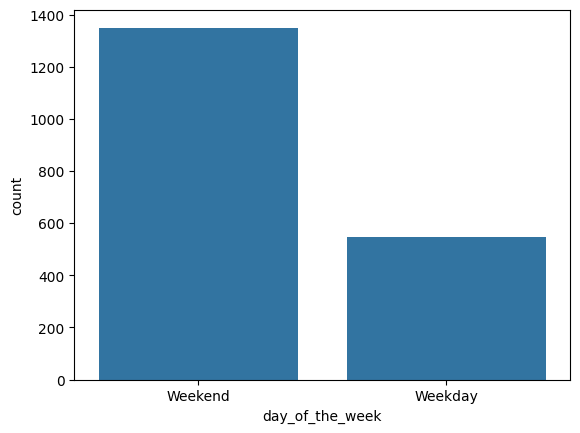

In [ ]:
# determine count of orders placed 'during day of the week'
sns.countplot(x='day_of_the_week', data=df)
plt.show()

Observations:
* Order placed on day_of_the_week is higher in the weekends(Saturday and Sunday). Approximately 1365 counts.
* Orders placed on weekdays(Monday to Friday) are lower, around 565 in total.
* Based on count plot, food orders are more frequently placed on weekends compared to weekdays.

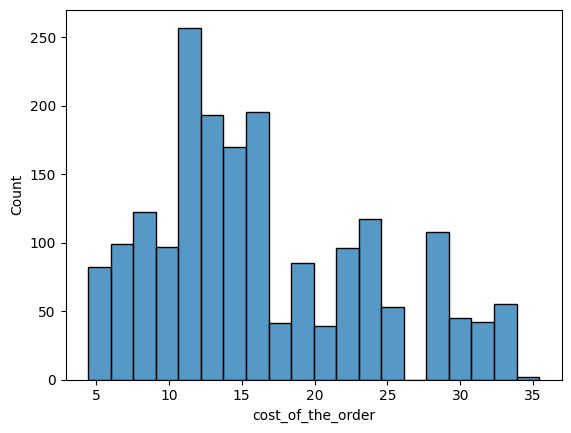

In [ ]:
# determine count of 'cost of the order'
sns.histplot(x='cost_of_the_order', data = df,kde=False, bins = 20);

Observations:
* The bin with a count of 5 has the highest number of orders, approximately 250.
* The order counts for bins 6 and 8 appear to be similar, with a proximity of around 190

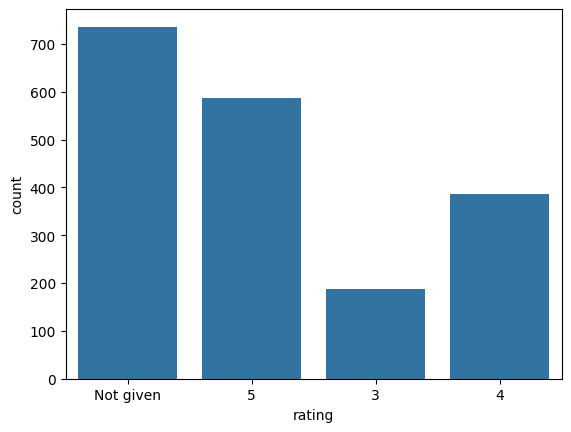

In [ ]:
# rating ounting determination
sns.countplot(x='rating', data=df)
plt.show()

Observations:
* The count for "Not Given" rating is notably high.
* A rating 5 indicates a strong positive sustomer reponse to placed orders.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

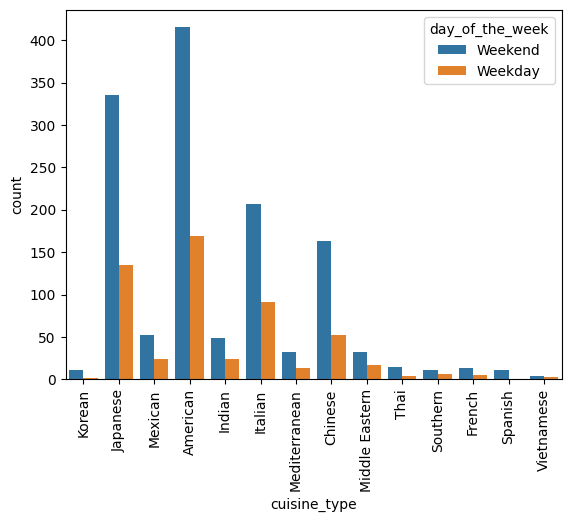

In [ ]:
#Determine count of food order in different cuisine types with the days of the week

sns.countplot(data=df,x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=90)

Observations:
* Orders placed on weekend are higher compared to weekdays.
* American,Japanese, Italian and Chinese cuisine order are more frequently placed on weekends than on weekdays.
* Spanish cuisine orders are mostly placed on weekends, with only 1 to 3 orders on weekdays.

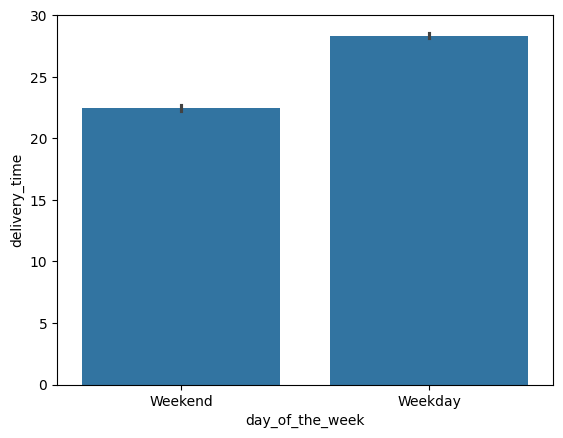

In [ ]:
# determine Delivery time difference during weekdays

sns.barplot(y ='delivery_time' ,x ='day_of_the_week', data=df)
plt.show()

Observations:
* Orders placed on weekends take less time to be delivered compared to weekdays.
* A higher number of orders are delivered on weekends than on weekdays.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

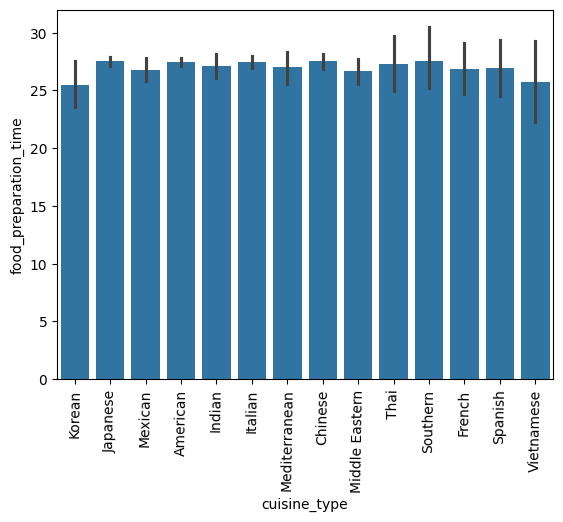

In [ ]:
# show how much time cuisine type take to prepare food when order is placed.

sns.barplot(data=df,x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation = 89)

Observations:
* Food preparation time is southern cuisne type is longer as well as the Thai cuisine type
* Korean Cuisine type take the least amount if time to prepare food

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# list the five top restaurants based on number of orders received.

df['restaurant_name'].value_counts(ascending = False).head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
* The top Five retaurants based on the number of oerdre received are Shake Shack, The Meatball Shop, Blue Robbon Sushi, Blue ribbon Fried Chicken and Parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
# Most popular cuisine on weekends.

df.groupby(['cuisine_type'])['day_of_the_week'].value_counts()

cuisine_type    day_of_the_week
American        Weekend            415
                Weekday            169
Chinese         Weekend            163
                Weekday             52
French          Weekend             13
                Weekday              5
Indian          Weekend             49
                Weekday             24
Italian         Weekend            207
                Weekday             91
Japanese        Weekend            335
                Weekday            135
Korean          Weekend             11
                Weekday              2
Mediterranean   Weekend             32
                Weekday             14
Mexican         Weekend             53
                Weekday             24
Middle Eastern  Weekend             32
                Weekday             17
Southern        Weekend             11
                Weekday              6
Spanish         Weekend             11
                Weekday              1
Thai            Weekend             15
                Weekday              4
Vietnamese      Weekend              4
                Weekday              3
Name: count, dtype: int64

#### Observations:

* American cuisine is the most popular in weekends, with a total with 415 count is American cuisine_type


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
# percentage of Orders cost more than 20 dollars

order_cost = df['cost_of_the_order'] > 20
counts = order_cost.sum()
result = counts / len(df['cost_of_the_order'])
percent = result.round(5) * 100
percent

29.241

#### Observations:
* 29.4% of the orderes have a cost exceeding 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
# Determine Mean delivery time

df['delivery_time'].mean()

24.161749209694417

Observations:
* The average delivery time for orders is approximately 24.161749209694417

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
# Find IDs of customer and number of orders they placed

df['customer_id'].value_counts().head()

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7


#### Observations:
* The highest number of ordres placed by the first customer ID displayed is 13
* The most frequent number of orders placed by a customer ranges between 7 and 13

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


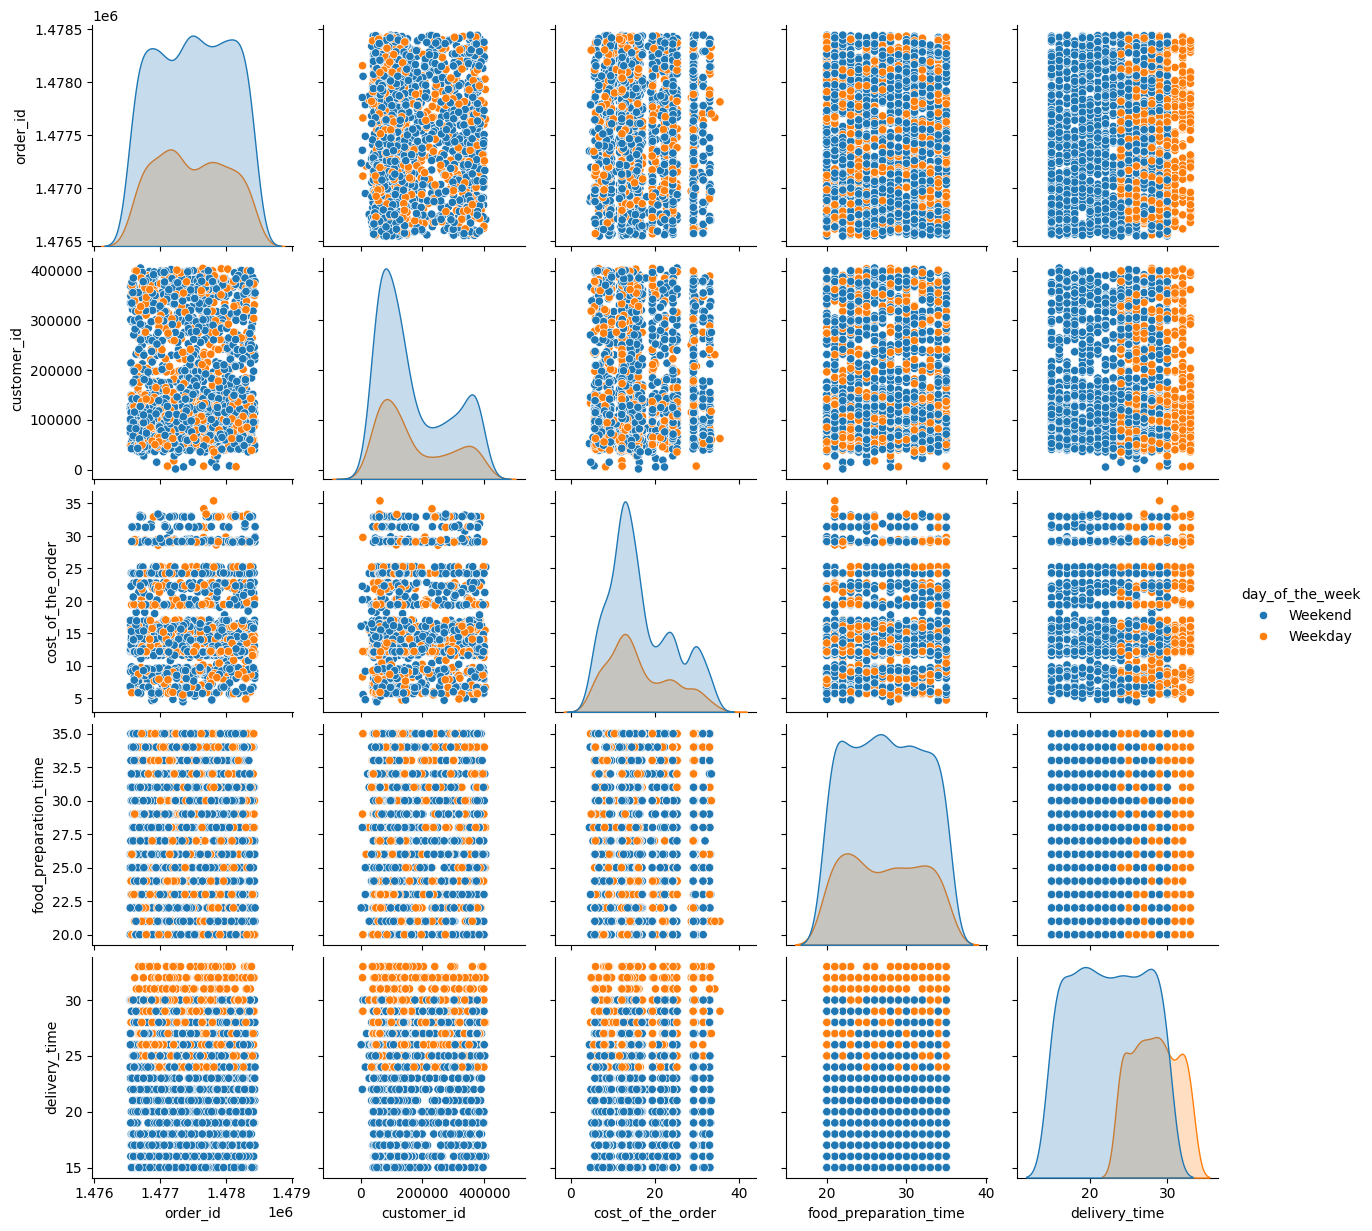

In [ ]:
# Write the code here
# Perform a multivariate analysis to explore relationships between the import variables in the dataset

sns.pairplot(df, hue='day_of_the_week')
plt.show()

Observations:
* The highest numberof orders are placed on weekends.
* Delivery times are shorter in minutes, with more deliveries completed on weekends.


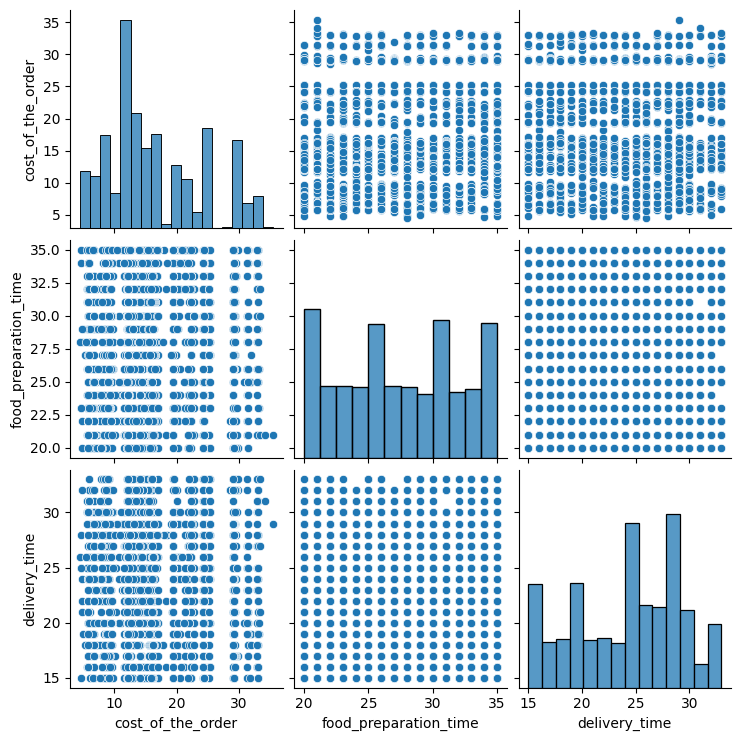

In [ ]:
# Dertermine 3 most important numerical variables on the dataset

sns.pairplot(df[['cost_of_the_order','food_preparation_time','delivery_time']]);
plt.show()

Observation:
* The scatterplots, which show relationship betweem mumerical variables, apprear in the off- diagonal
* The histogram, which show the distributin of individual variables, appear along the diagonal

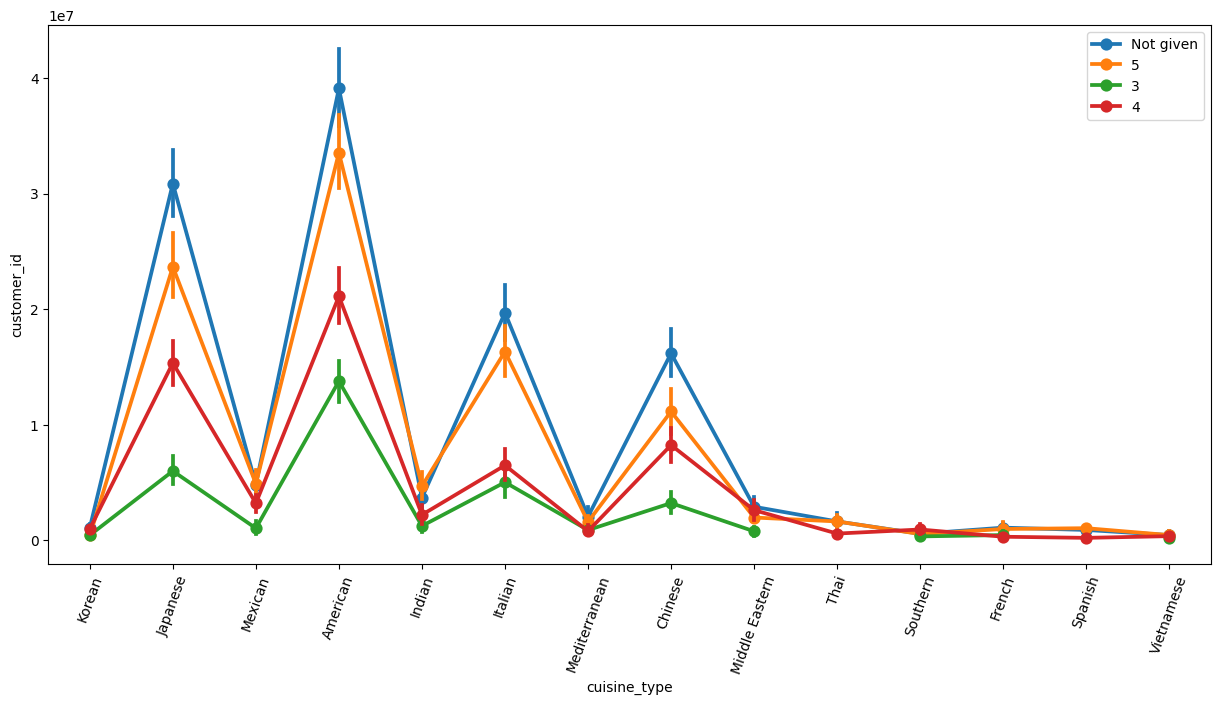

In [ ]:
# show customer rating the cuisine type ordered.

plt.figure(figsize=(15,7)) # plot resizing
sns.pointplot(x='cuisine_type', y='customer_id', data=df, estimator=sum, hue = 'rating')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=70) # Rotate X axis labls
plt.show()

Observation:
* Not given rating for southern French, Spanish and Vietnamese
* All the cuisine type are rated.
* American cuisine has the highest Not given and given rating than all the other cuisine type.

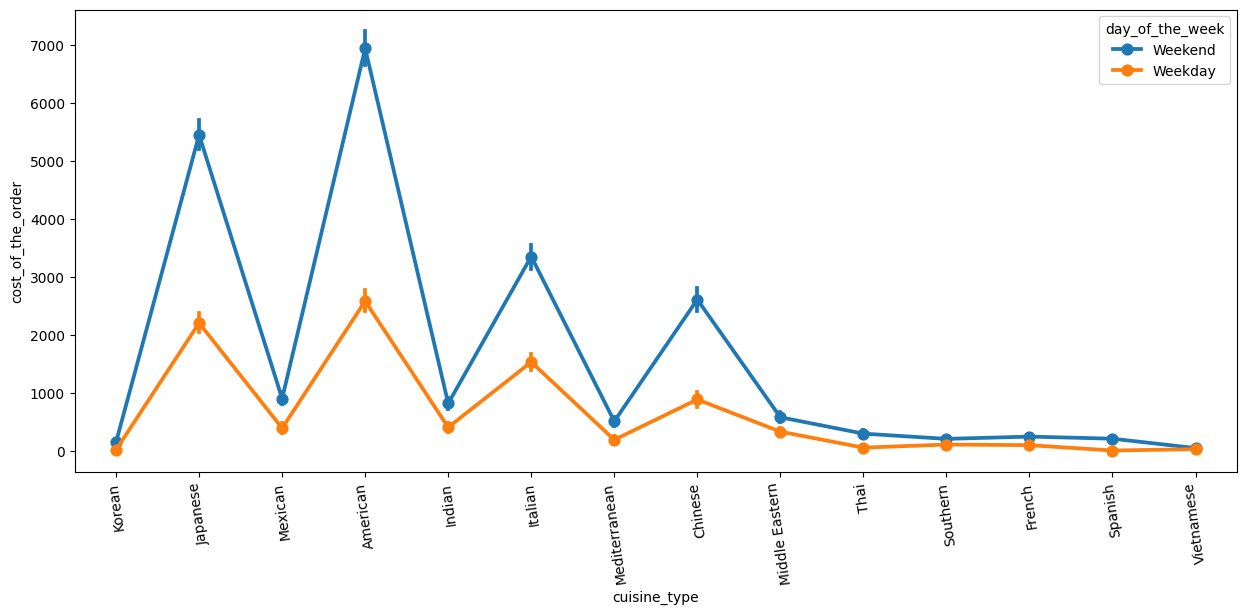

In [ ]:
# show diferrent cuisine type placed by customer during days of the week and cost.

plt.figure(figsize=(15, 6))
sns.pointplot(x='cuisine_type', y='cost_of_the_order', data=df, estimator=sum, hue = 'day_of_the_week')
plt.xticks(rotation=98) # To rotate the x axis labls
plt.show()

Observaion:
* All cuisine type have placed order on both weekdays and weekends.
* Order placed count is higher in the American cusisine on weekends.
* All cuisine have orders placed on weekends.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# find rating for each restaurant_name by group() and count()

rest_name_count = df.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
rest_name_count.head()

,restaurant_name,rating
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


In [ ]:
# extract retaurant_name with more than 50 ratings
rest_name_count_50 =rest_name_count[rest_name_count['rating']>50]['restaurant_name']
rest_name_count_50.head()

,restaurant_name
0,Shake Shack
1,The Meatball Shop
2,Blue Ribbon Sushi
3,Blue Ribbon Fried Chicken
4,Parm


In [ ]:
# convert column name rating to new DataFame called new_ratting

df_1 = df[df['rating']!= 'Not given']
new_rating = pd.DataFrame(df_1)
new_rating

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


In [ ]:
# merg DataFrame and new_rating dataframe as new_df

new_df = pd.merge(df, new_rating)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   object 
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 81.8+ KB


In [ ]:
# convert rate in the new_df from object to int

new_df['rating'] = new_df.rating.astype('int')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   int64  
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 81.8+ KB


In [ ]:
avg_rating = new_df.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index()
avg_rating

,restaurant_name,rating
0,'wichcraft,5.0
1,Ravagh Persian Grill,5.0
2,Chola Eclectic Indian Cuisine,5.0
3,Chote Nawab,5.0
4,Junoon,5.0
...,...,...
151,Woorijip,3.0
152,Byblos Restaurant,3.0
153,Pepe Giallo,3.0
154,Sushi Choshi,3.0


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# find net revenue generated by the company accross all orders.
df[(df['cost_of_the_order'] > 5 *0.15) & (df['cost_of_the_order']>20 * 0.25)]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


#### Observations:
* The company earns the most revenue from orders above $20 due to the higher commision rate.
* Orders below 5 do not generate any revenue for the company
* Orders between 5 and 20 contribute less per order but may still add up to a significant portion of revenue.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
food_min = df['food_preparation_time']
del_min = df['delivery_time']
total = food_min + del_min
total_1 = total > 60
per_cent = total_1 /len(total) * 100
per_cent.sum()

10.53740779768177

#### Observations:
* 10.54% of total order take more that 60 mins from order placement to delivery
* The majority of orders are delivered withing 60 minutes
* Reducing preparation or delivery time could enhance customer satisfaction.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Analyze the delivery time of orders on weekdays and weekends to determine how ,eam delivery time vary in weekday and weekends.

df.groupby('day_of_the_week')[['delivery_time']].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:
* The average delivery time on weekends is 28.34 minutes, which is higher compared to the 22.47 minutes recorded on weekends.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Every cuisine type had food orders placed by different customers.
* Not all customers provided a rating upon delivery, which explains the high count of "Not given" ratings.
* The number of 5-star ratings was higher than 4-star and 3-star ratings, suggesting that customers were highly satisfied with their orders.
* More food orders were placed on weekends compared to weekdays.
Delivery times were generally shorter on weekends (duration: 15 minutes) compared to weekdays (duration: 28 minutes).
* American cuisine had the highest number of orders on both weekends and weekdays. Japanese, Italian, and Chinese cuisines also showed a significant increase in orders across both time periods.
* "Shark Shark" was the most popular restaurant among customers. "The Meatball Shop" and "Blue Ribbon Sushi" were also frequently ordered from.


### Recommendations:

*  

In [ ]:
!jupyter nbconvert --to html FoodHub_project_FullCode.ipynb

[NbConvertApp] Converting notebook FoodHub_project_FullCode.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 10 image(s).
[NbConvertApp] Writing 2612845 bytes to FoodHub_project_FullCode.html


---